# EDA on Titatnic Data

Read the data, take care of nulls, visualize data, output cleaned up data

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import montecarlo as mc

# load training and test data
train = pd.read_csv('data/train.csv')
train.head()

test = pd.read_csv('data/test.csv')
test.head()

# check out the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# check out test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Handling Nulls

Three features have null values in train: Age, Cabin, and Embarked

Age: 177 nulls (~20%).  We can impute with the mean or median value, or
    randomly sample from the distribution.

Cabin: 687 nulls (~77%).  Probably just gonna drop this field.

Embarked: 2 nulls (<1%). Will impute with most likely value.

One feature also has a null in test: Fare- will impute with mean val

29.69911764705882
28.0


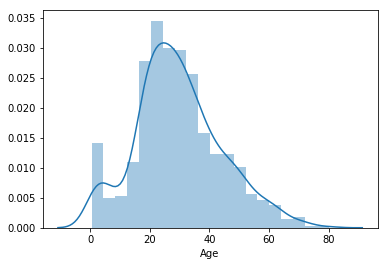

In [53]:
# Age
mean_age = np.mean(train['Age'])
print(mean_age) # 29.7

median_age = np.median(train['Age'].dropna())
print(median_age) # 28.0

sns.distplot(train['Age'].dropna())
plt.show()

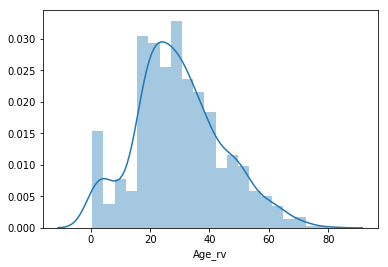

In [54]:
# we can generate RVs from the empirical cumulative distribution function
# to populate the null values.  

ecdf = mc.ecdf(train['Age'].dropna())

mc.generate_rv(ecdf) # we can generate random ages with this function

np.random.seed(8675309) # so we can replicate

# # fill NaNs: creating a new age column so we can compare
train['Age_rv'] = train['Age'].apply(lambda x: x if not pd.isnull(x) else generate_rv(ecdf))

test['Age_rv'] = test['Age'].apply(lambda x: x if not pd.isnull(x) else generate_rv(ecdf))

sns.distplot(train['Age_rv'])
plt.show()

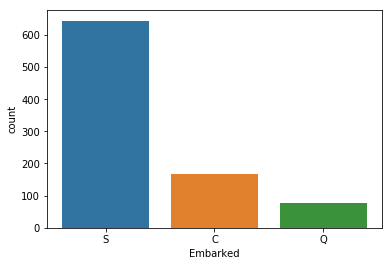

In [55]:
# cabin has over 600 null values...get rid of it
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

# embarked has null values
sns.countplot('Embarked', data=train)
plt.plot()

# most people embark from S (Southampton) so we'll replace the nulls with S
train[['Embarked']] = train[['Embarked']].fillna('S')
test[['Embarked']] = test[['Embarked']].fillna('S')

In [57]:
# Fare: impute mean
mean_fare = np.mean(train['Fare'])
print(mean_fare)
test[['Fare']] = test[['Fare']].fillna(value=mean_fare)

# replace age with Age_rv
train['Age'] = train['Age_rv']
test['Age'] = test['Age_rv']

"""
Irrelevant columns can be dropped:
- PassengerID (need to keep in test for submission file)
- Name
- Ticket
- Age_rv
"""

train.drop(columns=['PassengerId','Name','Ticket','Age_rv'], inplace=True)
test.drop(columns=['Name','Ticket','Age_rv'], inplace=True)


# NO MORE NULLS.
train.info()

32.2042079685746
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Visualize

Continuous Data
- Age
- Fare

Categorical Data:
- Pclass
- Sex
- SibSp
- Parch
- Embarked

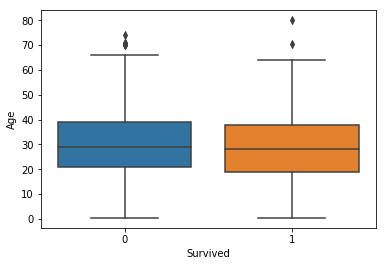

In [58]:
# Age
sns.boxplot(x='Survived', y='Age', data=train)
plt.show() # younger people are ever so slightly favored


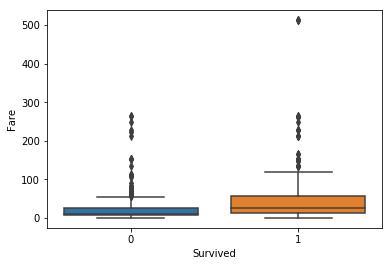

In [59]:
# Fare
sns.boxplot(x='Survived', y='Fare', data=train)
plt.show() # big spenders had better odds

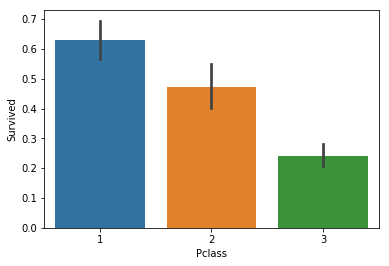

In [60]:
# Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show() # oooh, 1st class good odds, 3rd class bad

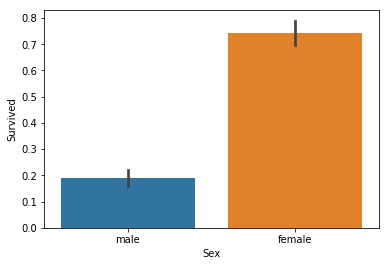

In [62]:
# Sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.show() # sucks to be a dude

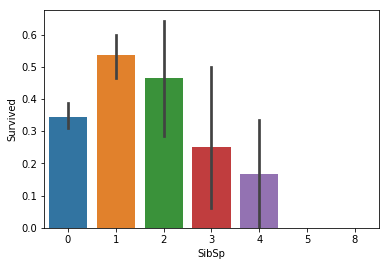

In [63]:
# Sibsp
sns.barplot(x='SibSp', y='Survived', data=train)
plt.show() #idk, fewer sibs/spouses better.  maybe lifeboats were like 2 OK...4 No way.

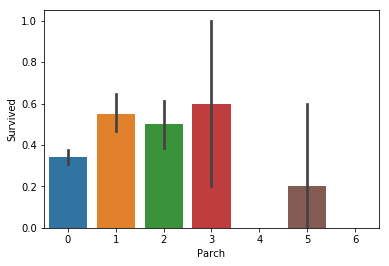

In [64]:
# Parch
sns.barplot(x='Parch', y='Survived', data=train)
plt.show()

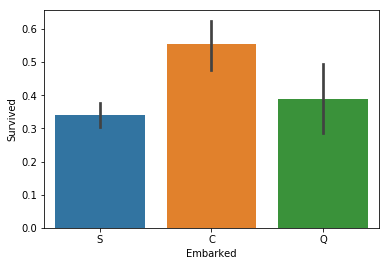

In [65]:
# Embarked
sns.barplot(x='Embarked', y='Survived', data=train)
plt.show() # it appears that French were at an advantage

# Output Cleaned Up Data

In [66]:
train.to_csv('data/train_clean.csv',index=False)
test.to_csv('data/test_clean.csv',index=F)